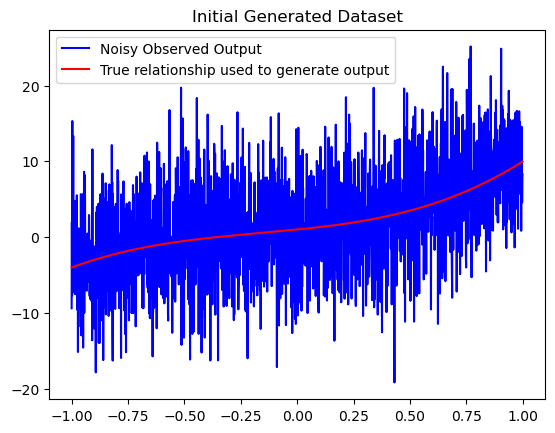

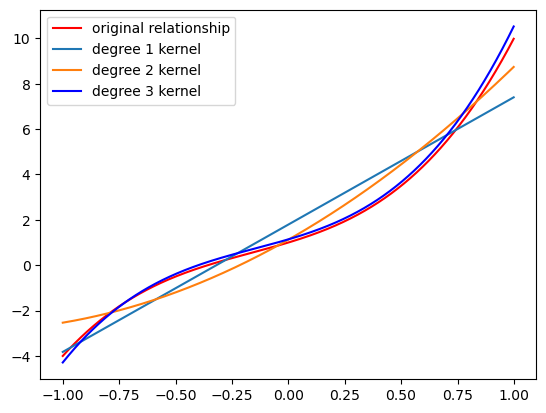

In [34]:
import numpy as np
import matplotlib.pyplot as plt
#np.random.seed(0)
# Data Generation
x=np.arange(-1,1.00,0.001)
y= 4*x**3  + 2*x**2 + 3*x + 1
t= y + np.random.randn(2000)*6

#Plotting the dataset
plt.figure(1)
plt.plot(x,t,'b-')
plt.plot(x,y,'r-')
plt.title("Initial Generated Dataset")
plt.legend(['Noisy Observed Output', 'True relationship used to generate output'])
plt.savefig("figure 1_polyprac.png")
#Train Test Split
indices=np.random.permutation(2000)
x_train=x[indices[0:1000]]
t_train=t[indices[0:1000]]
x_test=x[indices[1000:]]
t_test=t[indices[1000:]]

#Designing the phi matrix that contains the basis functions
plt.figure(2)
plt.plot(x,y,'r-')
for p in range(2,5):
    phi= np.zeros((1000,p))
    for i in range(1000):
        for j in range(p):
            phi[i,j]= x_train[i]**j
    w=np.zeros((p,1))
    w= (np.linalg.pinv(phi.T@phi)@phi.T)@t_train
    phi_test= np.zeros((1000,p))
    for i in range(1000):
        for j in range(p):
            phi_test[i,j]= x_test[i]**j
    y_pred=phi_test@w
    fit_phi=np.zeros((2000,p))
    for i in range(2000):
        for j in range(p):
            fit_phi[i,j]= x[i]**j
    fit=fit_phi@w
    if(p==2):
        plt.plot(x,fit)
    elif(p==3):
        plt.plot(x,fit)
    elif(p==4):
        plt.plot(x,fit,'b-')
plt.legend(['original relationship','degree 1 kernel','degree 2 kernel','degree 3 kernel'])
plt.savefig("figure 2_polyprac.png")